# Flood - Visualize -  Presentation Figures
<h3> 
Aaron Trefler <br/>
JPL <br/>
Created: 06/23/2016 <br/>
</h3>

# Setup

In [268]:
%load_ext autoreload
%autoreload 2

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy.io as sio 

from flood_functions import plot_grace_feature_histogram
from IPython.display import display, HTML
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
print 'Matplotlib Styles:', '\n'.join(plt.style.available)

Matplotlib Styles: seaborn-darkgrid
seaborn-notebook
classic
seaborn-ticks
grayscale
bmh
seaborn-talk
dark_background
ggplot
fivethirtyeight
seaborn-colorblind
seaborn-deep
seaborn-whitegrid
seaborn-bright
seaborn-poster
seaborn-muted
seaborn-paper
seaborn-white
seaborn-pastel
seaborn-dark
seaborn-dark-palette


In [68]:
#%matplotlib
%pylab inline

plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [69]:
dir_flood = '../../Raw Data/Flood Observatory/'
dir_python_data = '../Data/'
dir_grace = '../../Work_Matlab/Data/'
dir_figures = '../Figures/'

# Load Data

## Spatial Data

#### GRACE

In [5]:
# lowres grace features
f = open(dir_python_data + 'grace_features_lowres.p', 'rb')
feature_bricks = pickle.load(f)
f.close()

In [6]:
# lowres land mask
f = open(dir_python_data + 'grace_land_mask_lowres.p', 'rb')
land_mask = pickle.load(f)
f.close()

land_mask = np.flipud(land_mask.transpose())

### Flood Events

In [7]:
# lowres flood events
f = open(dir_python_data+'flood_event_brick_lowres.p', 'rb')
flood_brick = pickle.load(f)
f.close()

flood_brick = flood_brick[0]
flood_brick = np.flipud(flood_brick.transpose((1, 0, 2)))

### Modis Land Coverage

In [342]:
# lowres modis land coverage maps
f = open(dir_python_data + 'modis_mask_dict.p', 'rb')
modis_mask_dict = pickle.load(f)
f.close()

## Flood Observatory

In [343]:
df_name = 'df_flood_grace_time_location_features'

In [344]:
df_flood_grace = pd.read_csv(dir_python_data + df_name + '.csv')
df_flood_grace = df_flood_grace.drop('Unnamed: 0', axis=1)

print df_flood_grace.shape
df_flood_grace.head(1)

(1977, 41)


,Register #,Began,Date Began,Ended,Duration in Days,Dead,Displaced,Main cause,Severity *,Affected sq km,...,GRACE lwe clim rank,GRACE lwe clim rank norm,GRACE lwe noClim rank,GRACE lwe noClim rank norm,GRACE lwe rank post,GRACE lwe rank norm post,GRACE lwe clim rank post,GRACE lwe clim rank norm post,GRACE lwe noClim rank post,GRACE lwe noClim rank norm post
0,4352.0,13-Apr-16,13-Apr-16,22-Apr-16,10.0,0.0,0.0,Tropical Storm Fantala,1.0,117235.21,...,3.0,-0.995557,142.0,1.487868,0.0,0.0,0.0,0.0,0.0,0.0


# FIGURES

In [345]:
# section variables
tp = flood_brick.shape[2]
df = df_flood_grace

fig_large = (18,9.9)

# Flood Spatial Frequency

In [346]:
overlay = flood_brick
underlay = land_mask

title ='Location of Floods\n04/02 to 05/16'
cbar_label = 'Number of Floods'

cmap = 'Blues'
vmin = 0
vmax = 5

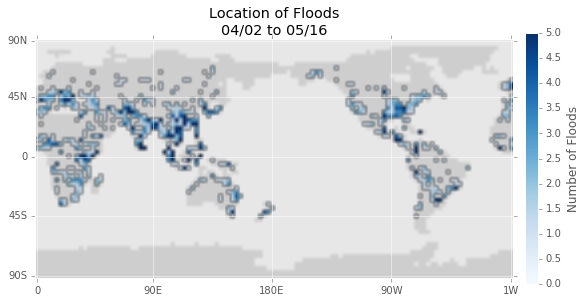

In [347]:
# alter overlay
overlay = np.nansum(overlay, axis=2)
overlay[overlay == 0] = np.nan

# setup figure
plt.figure(figsize=(9,4.95))
ax = plt.gca()
plt.title(title)

# flood frequencies
im = ax.imshow(overlay, cmap=cmap, vmin=vmin, vmax=vmax)
plt.xticks([0, 29, 59, 89, 119], ['0', '90E','180E', '90W', '1W'])
plt.yticks([0, 14, 29, 44, 59], ['90N', '45N','0', '45S', '90S'])
plt.colorbar(im, label=cbar_label, \
             fraction=0.025, pad=0.025)

# world map
plt.imshow(land_mask, cmap='binary', alpha=0.1)

# save and show
plt.savefig(dir_figures + 'PP_Presentation/flood_frequency.png',\
            bbox_inches='tight')
plt.show()

# Histograms

## GRACE Values Prior to Flooding

In [348]:
data = (df['GRACE lwe rank'] / tp) * 100

title = 'GRACE Values Prior to Flooding\n04/02 to 05/16'
feature_description = 'Land Water Equivalent Percentile for MASCON'

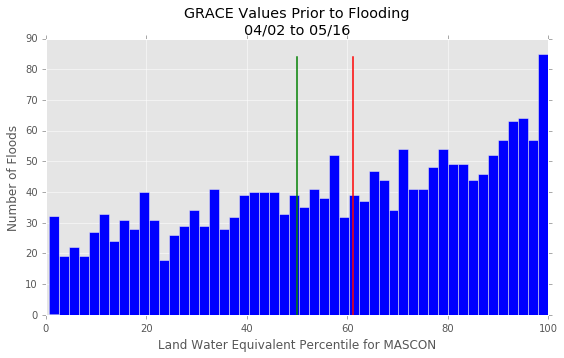

In [349]:
plt.figure(figsize=(9,4.95))
plot_grace_feature_histogram(feature_description, data,\
                             num_bins=50, middle_value=50, \
                             title=title)
plt.savefig(dir_figures + 'PP_Presentation/grace_prior_to_flooding.png',\
            bbox_inches='tight')
plt.show()

## GRACE Climatology Anomalies Prior to Flooding

In [350]:
data = (df['GRACE lwe noClim rank'] / tp) * 100

title = 'GRACE Climatology Removed Values Prior to Flooding\n04/02 to 05/16'
feature_description = 'Land Water Equivalent Percentile for MASCON'

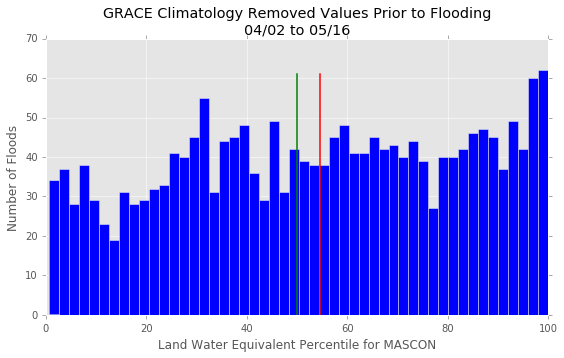

In [351]:
plt.figure(figsize=(9,4.95))
plot_grace_feature_histogram(feature_description, data,\
                             num_bins=50, middle_value=50, \
                             title=title)
plt.savefig(dir_figures + 'PP_Presentation/grace_noClim_prior_to_flooding.png',\
            bbox_inches='tight')
plt.show()

## GRACE Climatology Prior to Flooding

In [352]:
data = df['GRACE lwe clim rank']

title = 'GRACE Climatology Prior to Flooding\n04/02 to 05/16'
feature_description = 'Rank for MASCON'

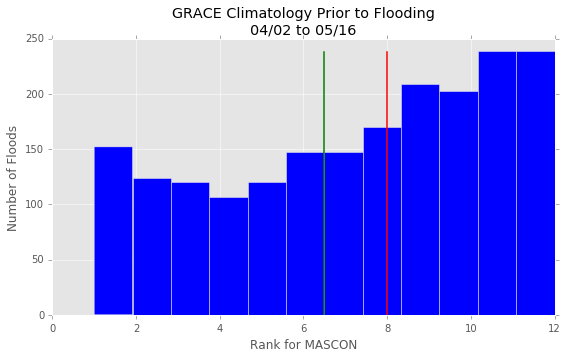

In [353]:
plt.figure(figsize=(9,4.95))
plot_grace_feature_histogram(feature_description, data,\
                             num_bins=12, middle_value=6.5, \
                             title=title)
plt.savefig(dir_figures + 'PP_Presentation/grace_clim_prior_to_flooding.png',\
            bbox_inches='tight')
plt.show()

# Spatial Maps

## GRACE Values Prior to Flooding

In [354]:
feature = 'grace_lwe_rank_lowres'

title ="Average GRACE Value Prior to Flooding\nby Mascon"
cbar_label = 'Land Water Equivalent Percentile'

cmap='bwr'
vmax = 0
vmin = 100

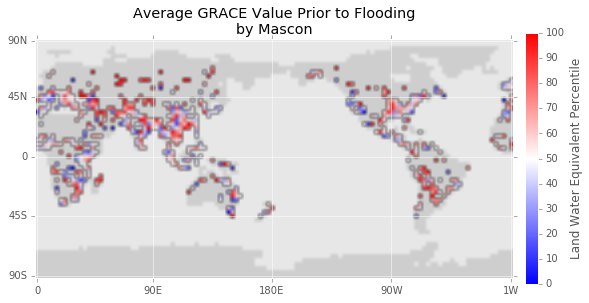

In [355]:
feature_brick = feature_bricks[feature]
feature_brick = (feature_brick / tp) * 100
feature_brick = np.flipud(feature_brick.transpose((1,0,2)))
feature_brick_masked = feature_brick * flood_brick
feature_brick_masked[feature_brick_masked == 0] = np.nan
feature_brick_masked_mean = np.nanmean(feature_brick_masked, axis=2)

# setup figure
plt.figure(figsize=((9,4.95)))
plt.title(title)

# plot data
plt.imshow(feature_brick_masked_mean, cmap='bwr', vmin=vmin, vmax=vmax)
plt.xticks([0, 29, 59, 89, 119], ['0', '90E','180E', '90W', '1W'])
plt.yticks([0, 14, 29, 44, 59], ['90N', '45N','0', '45S', '90S'])
plt.colorbar(fraction=0.025, pad=0.025, label=cbar_label)

# plot land mask
plt.imshow(land_mask, cmap='binary', alpha=0.1)

plt.savefig(dir_figures + 'PP_presentation/grace_flooding_maps_' + feature,\
            bbox_inches='tight')
plt.show()

## GRACE Climatology Anomalies Prior to Flooding

In [356]:
feature = 'grace_lwe_noClim_rank_lowres'

title ="Average GRACE Climatology Removed Value Prior to Flooding\nby Mascon"
cbar_label = 'Land Water Equivalent Percentile'

cmap='bwr'
vmax = 0
vmin = 100

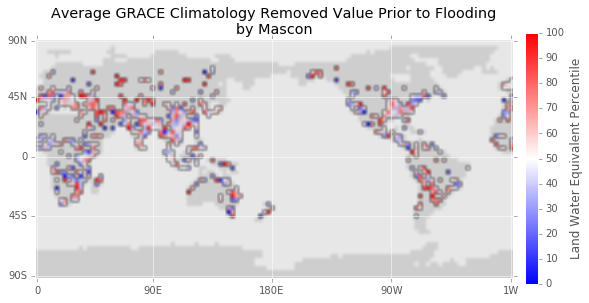

In [357]:
feature_brick = feature_bricks[feature]
feature_brick = (feature_brick / tp) * 100
feature_brick = np.flipud(feature_brick.transpose((1,0,2)))
feature_brick_masked = feature_brick * flood_brick
feature_brick_masked[feature_brick_masked == 0] = np.nan
feature_brick_masked_mean = np.nanmean(feature_brick_masked, axis=2)

# setup figure
plt.figure(figsize=((9,4.95)))
plt.title(title)

# plot data
plt.imshow(feature_brick_masked_mean, cmap='bwr', vmin=vmin, vmax=vmax)
plt.xticks([0, 29, 59, 89, 119], ['0', '90E','180E', '90W', '1W'])
plt.yticks([0, 14, 29, 44, 59], ['90N', '45N','0', '45S', '90S'])
plt.colorbar(fraction=0.025, pad=0.025, label=cbar_label)

# plot land mask
plt.imshow(land_mask, cmap='binary', alpha=0.1)

plt.savefig(dir_figures + 'PP_presentation/grace_flooding_maps_' + feature,\
            bbox_inches='tight')
plt.show()

## GRACE Climatology Prior to Flooding

In [358]:
feature = 'grace_lwe_clim_rank_lowres'

title ="Average GRACE Climatology Prior to Flooding\nby Mascon"
cbar_label = 'Land Water Equivalent Percentile'

cmap='bwr'
vmax = 0
vmin = 100

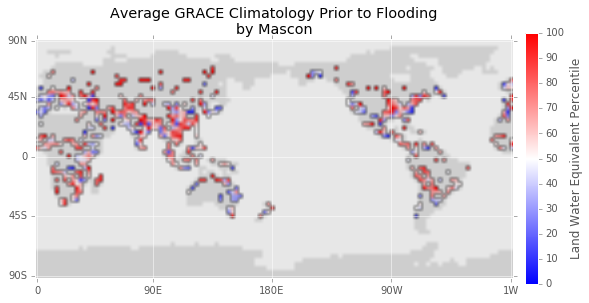

In [359]:
feature_brick = feature_bricks[feature]
feature_brick = (feature_brick / 12) * 100
feature_brick = np.flipud(feature_brick.transpose((1,0,2)))
feature_brick_masked = feature_brick * flood_brick
feature_brick_masked[feature_brick_masked == 0] = np.nan
feature_brick_masked_mean = np.nanmean(feature_brick_masked, axis=2)

# setup figure
plt.figure(figsize=((9,4.95)))
plt.title(title)

# plot data
plt.imshow(feature_brick_masked_mean, cmap='bwr', vmin=vmin, vmax=vmax)
plt.xticks([0, 29, 59, 89, 119], ['0', '90E','180E', '90W', '1W'])
plt.yticks([0, 14, 29, 44, 59], ['90N', '45N','0', '45S', '90S'])
plt.colorbar(fraction=0.025, pad=0.025, label=cbar_label)

# plot land mask
plt.imshow(land_mask, cmap='binary', alpha=0.1)

plt.savefig(dir_figures + 'PP_presentation/grace_flooding_maps_' + feature,\
            bbox_inches='tight')
plt.show()

# Land Coverage Analysis

In [360]:
feature = 'grace_lwe_noClim_rank_lowres'

In [361]:
feature_brick = feature_bricks[feature]
feature_brick = (feature_brick / tp) * 100
feature_brick = np.flipud(feature_brick.transpose((1,0,2)))
feature_brick_masked = feature_brick * flood_brick
feature_brick_masked[feature_brick_masked == 0] = np.nan

In [362]:
# empty lists
mean_noClim = []
stdE_noClim = []
items = []
num_floods = []

# calculate metrics for All Floods
items.append('All Floods')
floods = len(feature_brick_masked[feature_brick_masked > 0].ravel())
num_floods.append(floods)
mean_noClim.append(np.nanmean(feature_brick_masked))
stdE_noClim.append(np.nanstd(feature_brick_masked) / sqrt(num_floods))

# calculate metrics based on land cover type
for key, modis_mask in modis_mask_dict.items():
    
    # mask out land cover
    modis_mask_brick = np.tile(modis_mask[:,:,np.newaxis],(1,1,tp))
    feature_brick_modis_masked = feature_brick_masked * modis_mask_brick

    # number of floods
    floods = len(feature_brick_modis_masked[feature_brick_modis_masked > 0].ravel())

    if (floods > 0):
        items.append(key.replace('modis_',''))
        num_floods.append(floods)
        mean_noClim.append(np.nanmean(feature_brick_modis_masked))
        stdE_noClim.append(np.nanstd(feature_brick_modis_masked) / sqrt(floods))

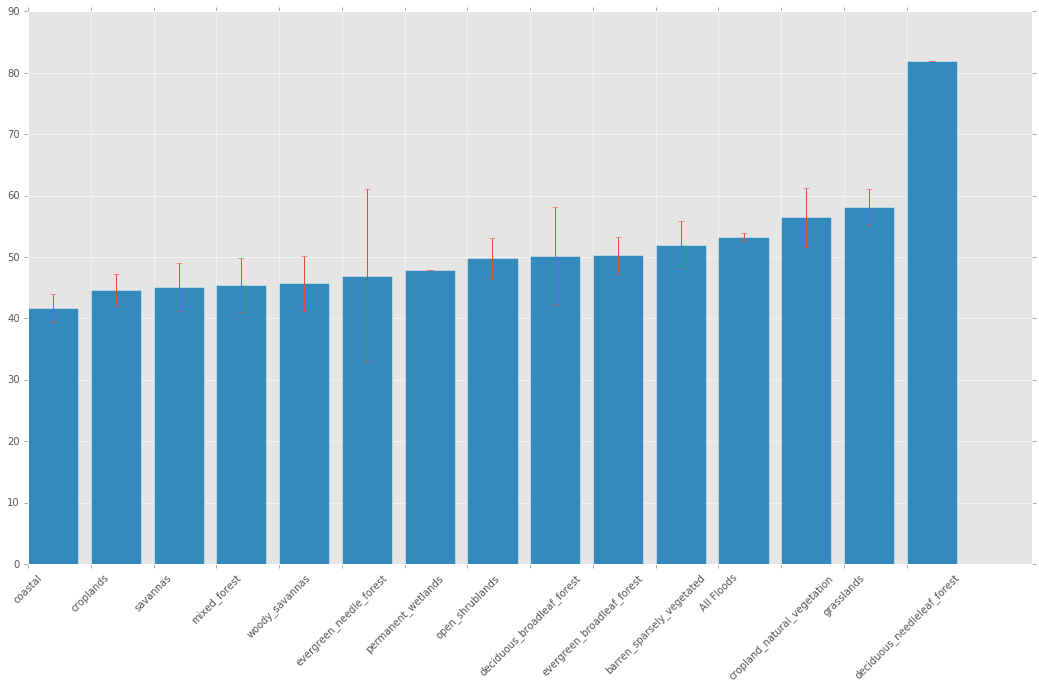

[104, 79, 38, 35, 31, 4, 1, 45, 8, 50, 37, 1378, 15, 67, 1]
1893


In [363]:
plt.figure(figsize=(fig_large))

x = range(len(items))

together = zip(mean_noClim, items, stdE_noClim, num_floods)
sorted_together = sorted(together)
mean_noClim = [i[0] for i in sorted_together]
items = [i[1] for i in sorted_together]
stdE_noClim = [i[2] for i in sorted_together]
num_floods = [i[3] for i in sorted_together]

plt.bar(x, mean_noClim, yerr=stdE_noClim)
plt.xticks(x, items, rotation=45)
plt.show()

print num_floods
print np.sum(num_floods)

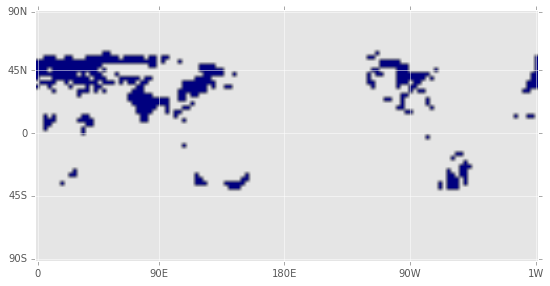

In [365]:
plt.figure(figsize=((9,4.95)))
plt.imshow(modis_crop)
plt.xticks([0, 29, 59, 89, 119], ['0', '90E','180E', '90W', '1W'])
plt.yticks([0, 14, 29, 44, 59], ['90N', '45N','0', '45S', '90S'])
plt.show()

In [59]:
feature = 'grace_noClim_crop'

title= title ="Average GRACE Climatology Removed Value Prior to Flooding\nby Mascon"+\
                "over Croplands"
#title ="Average GRACE Climatology Removed Value Prior to Flooding\nby Mascon"
cbar_label = 'Land Water Equivalent Percentile'

cmap='bwr'
vmax = 0
vmin = 100

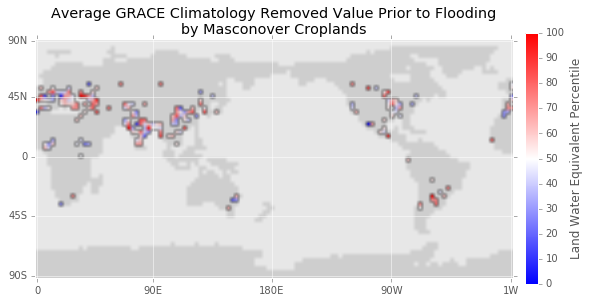

In [60]:
# setup figure
plt.figure(figsize=((9,4.95)))
plt.title(title)

# plot data
plt.imshow(eval(feature), cmap=cmap, vmin=vmin, vmax=vmax)
plt.xticks([0, 29, 59, 89, 119], ['0', '90E','180E', '90W', '1W'])
plt.yticks([0, 14, 29, 44, 59], ['90N', '45N','0', '45S', '90S'])
plt.colorbar(fraction=0.025, pad=0.025, label=cbar_label)

# plot land mask
plt.imshow(land_mask, cmap='binary', alpha=0.1)

plt.savefig(dir_figures + 'PP_presentation/grace_flooding_maps_' + feature + '_mask_crop',\
            bbox_inches='tight')
plt.show()

In [63]:
np.nanmean(grace_noClim)

54.680171814943215

In [64]:
np.nanmean(grace_noClim_crop)

55.447861829005575